In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv("../data/data.csv")

In [57]:
df.head()

,subject_id,hadm_id,seq_num,icd_code,admittime,admission_type,admission_location,insurance,language,marital_status,...,anchor_age,first_careunit,last_careunit,intime,los,drg_code,description,drg_severity,drg_mortality,ed_los
0,10196368,24464472,1.0,80604,2184-05-03 13:50:00,EW EMER.,EMERGENCY ROOM,Other,ENGLISH,MARRIED,...,71,Trauma SICU (TSICU),Trauma SICU (TSICU),2184-05-03 14:36:00,2.301308,40.0,SPINAL DISORDERS & INJURIES,2.0,2.0,658.0
1,10348324,27926100,1.0,80608,2137-06-29 20:21:00,EW EMER.,EMERGENCY ROOM,Other,ENGLISH,MARRIED,...,58,Trauma SICU (TSICU),Trauma SICU (TSICU),2137-07-02 01:42:38,1.893750,23.0,SPINAL PROCEDURES,2.0,1.0,372.0
2,10393331,21425859,1.0,80600,2114-03-27 00:01:00,EW EMER.,EMERGENCY ROOM,Other,?,unknown,...,48,Trauma SICU (TSICU),Trauma SICU (TSICU),2114-03-27 01:30:00,17.376539,4.0,TRACHEOSTOMY W MV 96+ HOURS W EXTENSIVE PROCEDURE,4.0,3.0,384.0
3,10441044,21256821,3.0,80605,2165-06-19 01:58:00,EW EMER.,EMERGENCY ROOM,Other,ENGLISH,SINGLE,...,55,Trauma SICU (TSICU),Trauma SICU (TSICU),2165-06-19 03:27:00,13.884815,912.0,MUSCULOSKELETAL & OTHER PROCEDURES FOR MULTIPL...,4.0,3.0,183.0
4,10521666,28942795,1.0,80605,2176-03-24 08:24:00,EW EMER.,EMERGENCY ROOM,Medicare,ENGLISH,MARRIED,...,85,Trauma SICU (TSICU),Trauma SICU (TSICU),2176-03-24 09:29:00,29.218449,23.0,SPINAL PROCEDURES,3.0,3.0,212.0


In [58]:
df.columns

Index(['subject_id', 'hadm_id', 'seq_num', 'icd_code', 'admittime',
       'admission_type', 'admission_location', 'insurance', 'language',
       'marital_status', 'race', 'gender', 'anchor_age', 'first_careunit',
       'last_careunit', 'intime', 'los', 'drg_code', 'description',
       'drg_severity', 'drg_mortality', 'ed_los'],
      dtype='object')

In [59]:
df['intime'] = pd.to_datetime(df['intime'])
df["in_month"] = df["intime"].dt.month_name()

In [60]:
df['in_month'].value_counts()

in_month
July         25
September    25
June         19
January      19
December     17
November     16
August       16
October      16
March        15
May          14
February     11
April        11
Name: count, dtype: int64

In [61]:
df['in_day'] = df['intime'].dt.day_name()
df['in_day'].value_counts()

in_day
Saturday     36
Monday       33
Tuesday      29
Sunday       28
Thursday     28
Wednesday    25
Friday       25
Name: count, dtype: int64

In [62]:
df['in_hour'] = df['intime'].dt.hour
df['in_hour'].value_counts().sort_index()

in_hour
0     11
1     12
2      8
3      9
4      8
5     11
6      8
7      6
8      3
9      2
10     6
11    10
12     4
13     3
14     7
15    10
16     5
17    14
18    13
19     5
20     7
21    17
22    13
23    12
Name: count, dtype: int64

In [63]:
df['is_weekend'] = df['intime'].dt.dayofweek.isin([5, 6])
df['is_weekend'].value_counts()

is_weekend
False    140
True      64
Name: count, dtype: int64

In [64]:
df.drop(columns=['admittime','intime'], inplace=True)

In [65]:
df.columns

Index(['subject_id', 'hadm_id', 'seq_num', 'icd_code', 'admission_type',
       'admission_location', 'insurance', 'language', 'marital_status', 'race',
       'gender', 'anchor_age', 'first_careunit', 'last_careunit', 'los',
       'drg_code', 'description', 'drg_severity', 'drg_mortality', 'ed_los',
       'in_month', 'in_day', 'in_hour', 'is_weekend'],
      dtype='object')

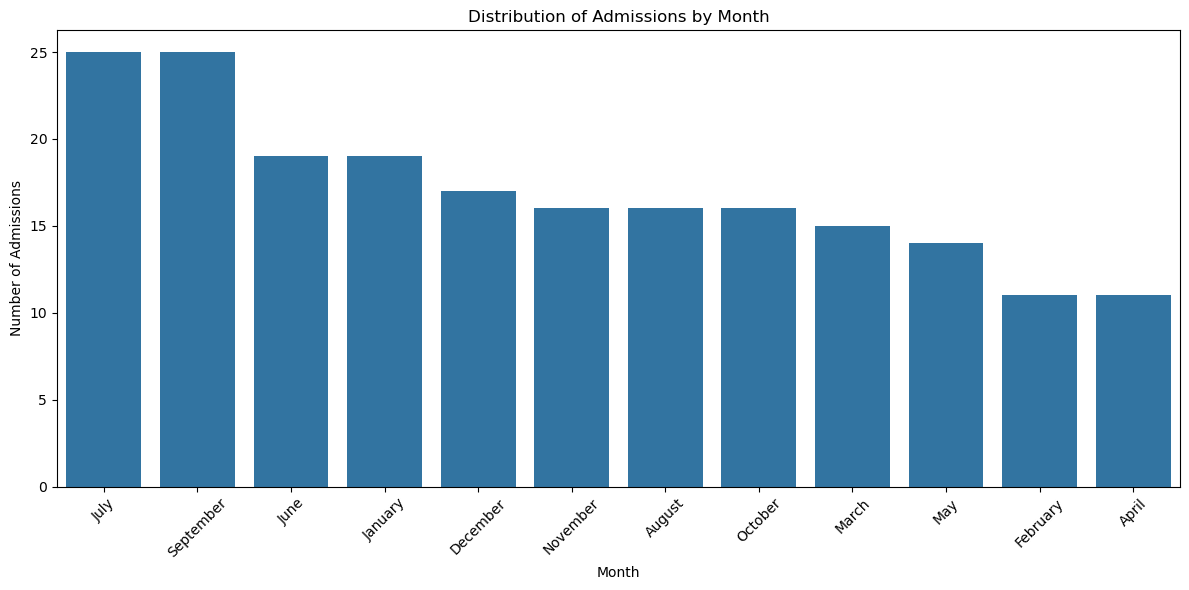

In [66]:
# Plotting the distribution of admission counts by month
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='in_month', order=df['in_month'].value_counts().index)
plt.title('Distribution of Admissions by Month')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.tight_layout()


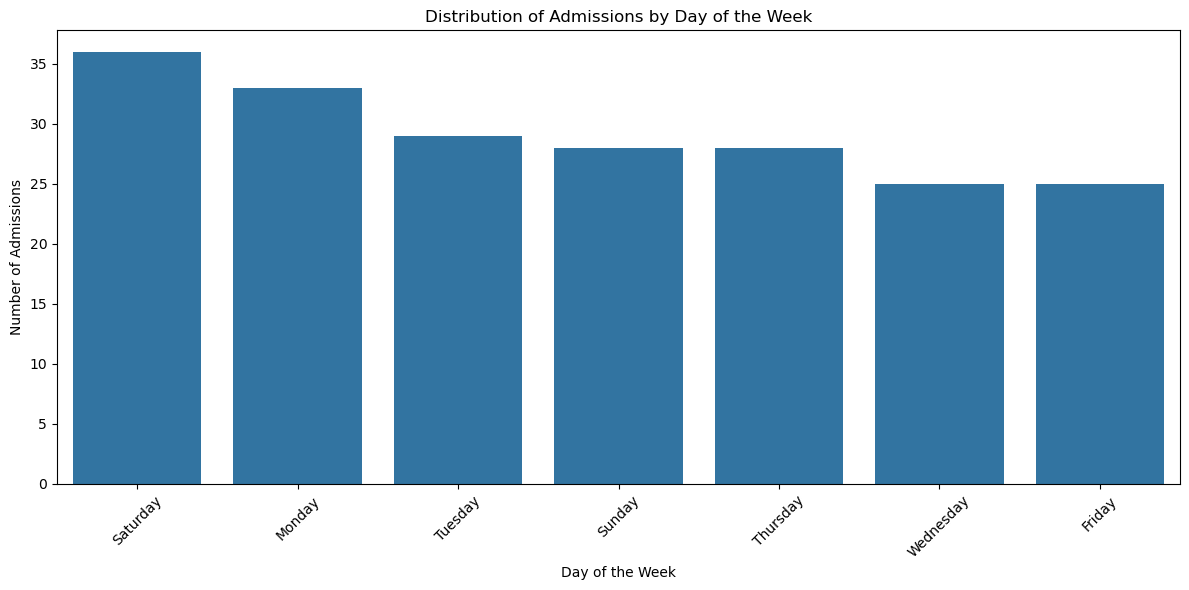

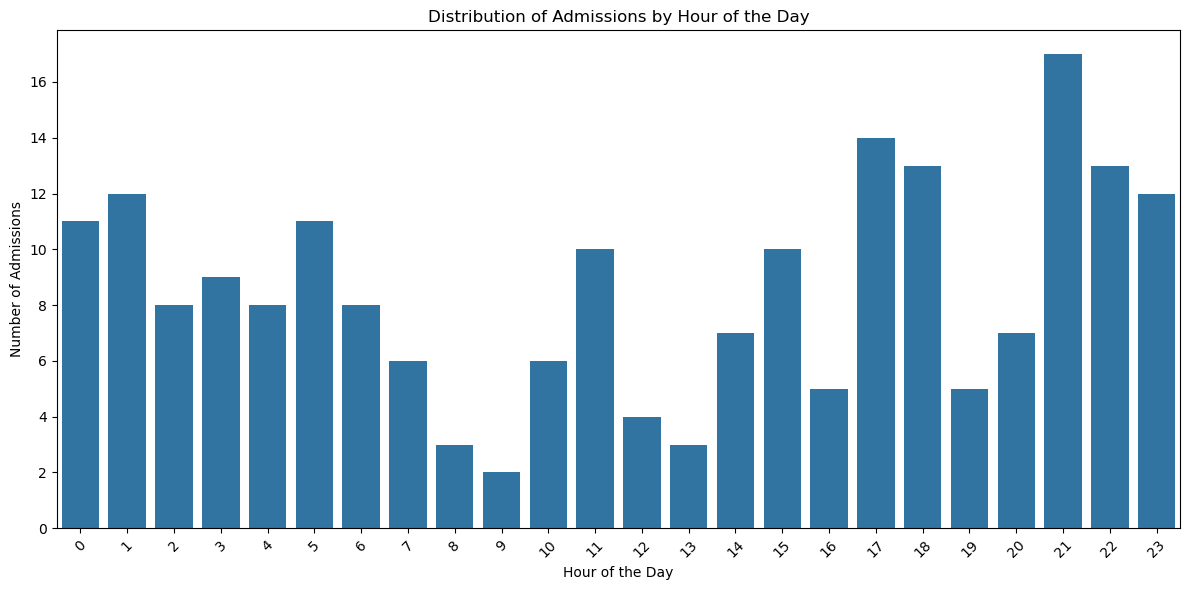

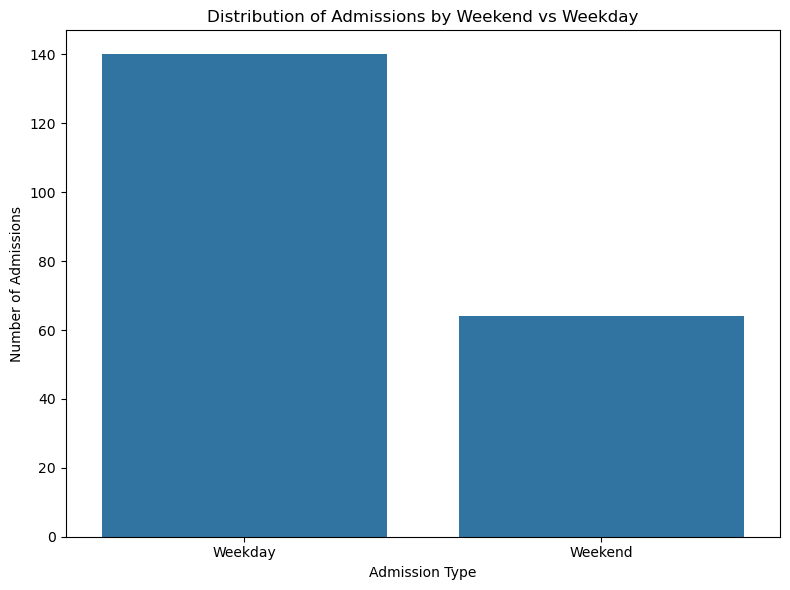

In [67]:
#Plotting distribution of admissions by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='in_day', order=df['in_day'].value_counts().index)
plt.title('Distribution of Admissions by Day of the Week')
plt.xticks(rotation=45)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Admissions')
plt.tight_layout()
# Plotting distribution of admissions by hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='in_hour', order=sorted(df['in_hour'].unique()))
plt.title('Distribution of Admissions by Hour of the Day')
plt.xticks(rotation=45)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Admissions')
plt.tight_layout()
# Plotting distribution of admissions by weekend vs weekday
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_weekend')
plt.title('Distribution of Admissions by Weekend vs Weekday')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.xlabel('Admission Type')
plt.ylabel('Number of Admissions')
plt.tight_layout()
# Show all plots
plt.show()


In [68]:
df.columns

Index(['subject_id', 'hadm_id', 'seq_num', 'icd_code', 'admission_type',
       'admission_location', 'insurance', 'language', 'marital_status', 'race',
       'gender', 'anchor_age', 'first_careunit', 'last_careunit', 'los',
       'drg_code', 'description', 'drg_severity', 'drg_mortality', 'ed_los',
       'in_month', 'in_day', 'in_hour', 'is_weekend'],
      dtype='object')

/var/folders/yg/f1g020cd6zl_n34fsq8_h_2r0000gn/T/ipykernel_91094/1144534855.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='is_weekend', y='los', ci=None)


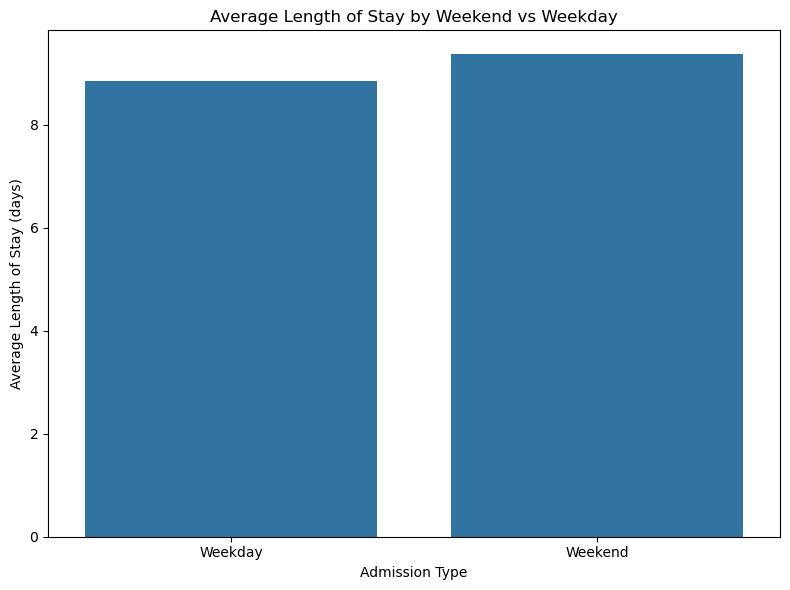

/var/folders/yg/f1g020cd6zl_n34fsq8_h_2r0000gn/T/ipykernel_91094/1144534855.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='in_month', y='los', ci=None, order=df['in_month'].value_counts().index)


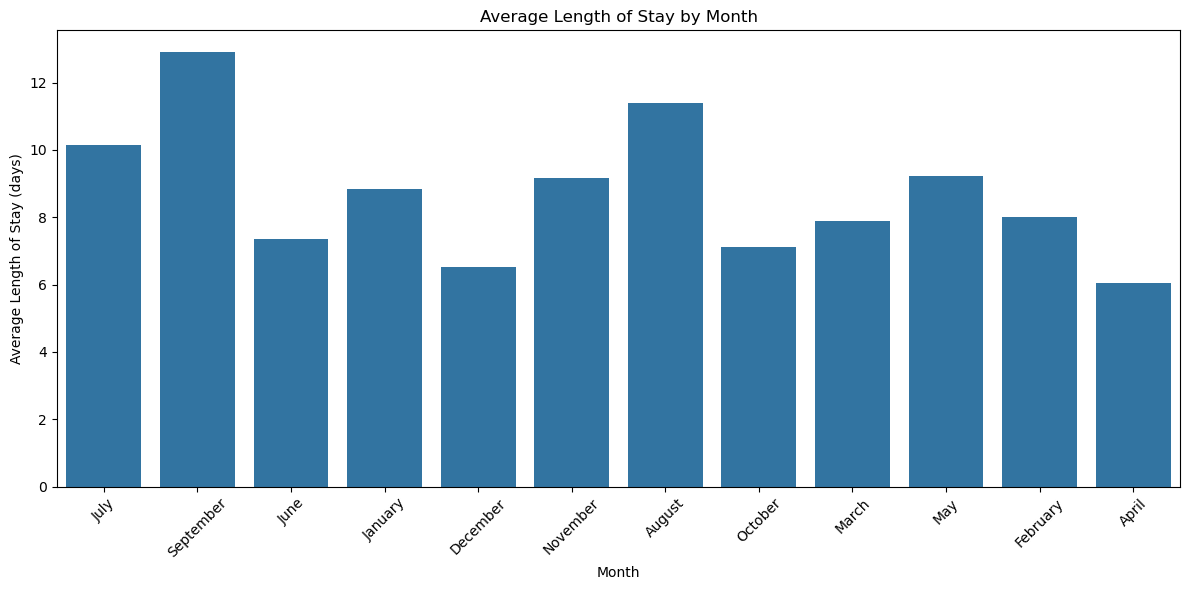

/var/folders/yg/f1g020cd6zl_n34fsq8_h_2r0000gn/T/ipykernel_91094/1144534855.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='in_day', y='los', ci=None, order=df['in_day'].value_counts().index)


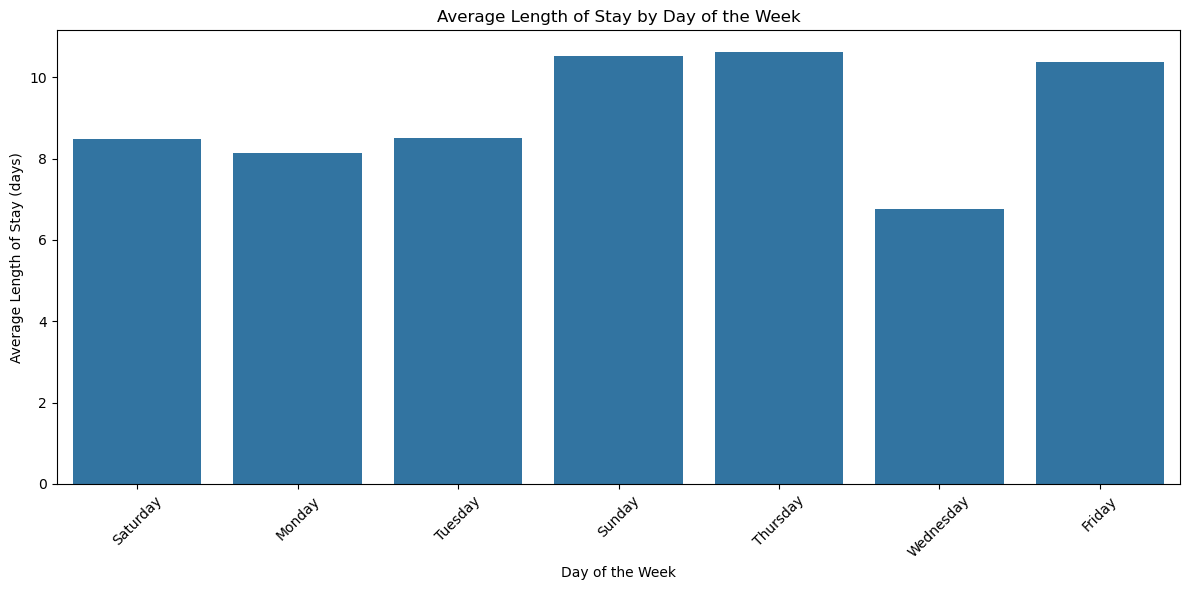

/var/folders/yg/f1g020cd6zl_n34fsq8_h_2r0000gn/T/ipykernel_91094/1144534855.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='in_hour', y='los', ci=None, order=sorted(df['in_hour'].unique()))


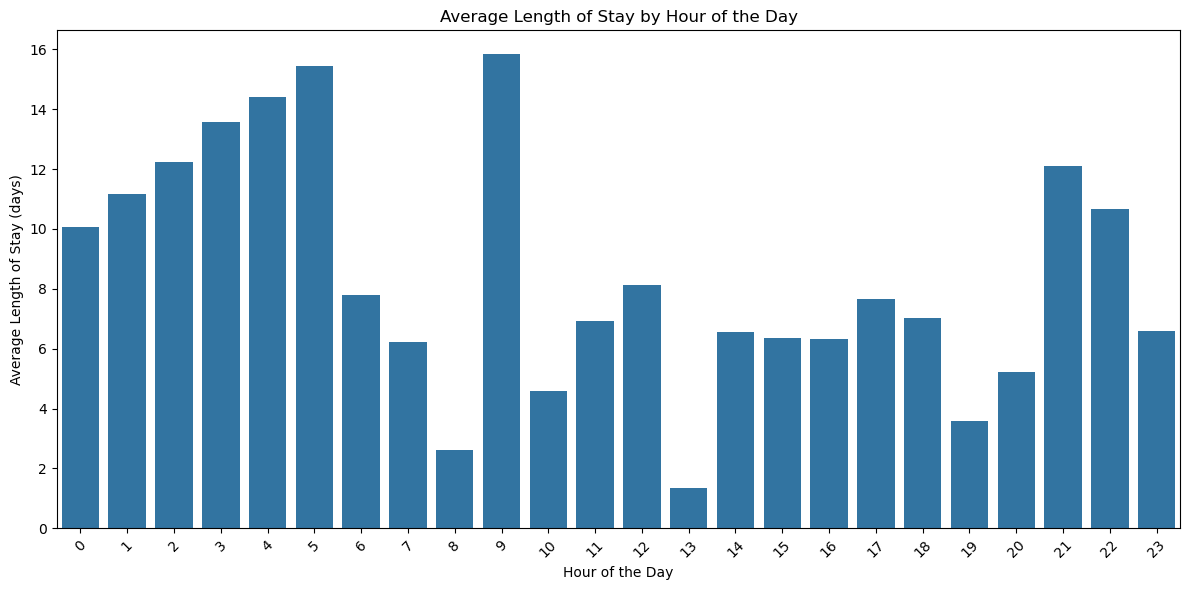

In [69]:
# plot average lenght of stay by weekend vs weekday
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='is_weekend', y='los', ci=None)
plt.title('Average Length of Stay by Weekend vs Weekday')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.xlabel('Admission Type')
plt.ylabel('Average Length of Stay (days)')
plt.tight_layout()
# Show the plot
plt.show()
# Plotting average length of stay by month
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='in_month', y='los', ci=None, order=df['in_month'].value_counts().index)
plt.title('Average Length of Stay by Month')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Average Length of Stay (days)')
plt.tight_layout()
# Show the plot
plt.show()
# Plotting average length of stay by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='in_day', y='los', ci=None, order=df['in_day'].value_counts().index)
plt.title('Average Length of Stay by Day of the Week')
plt.xticks(rotation=45)
plt.xlabel('Day of the Week')
plt.ylabel('Average Length of Stay (days)')
plt.tight_layout()
# Show the plot
plt.show()
# Plotting average length of stay by hour of the day
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='in_hour', y='los', ci=None, order=sorted(df['in_hour'].unique()))
plt.title('Average Length of Stay by Hour of the Day')
plt.xticks(rotation=45)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Length of Stay (days)')
plt.tight_layout()
# Show the plot
plt.show()


In [70]:
df.columns

Index(['subject_id', 'hadm_id', 'seq_num', 'icd_code', 'admission_type',
       'admission_location', 'insurance', 'language', 'marital_status', 'race',
       'gender', 'anchor_age', 'first_careunit', 'last_careunit', 'los',
       'drg_code', 'description', 'drg_severity', 'drg_mortality', 'ed_los',
       'in_month', 'in_day', 'in_hour', 'is_weekend'],
      dtype='object')

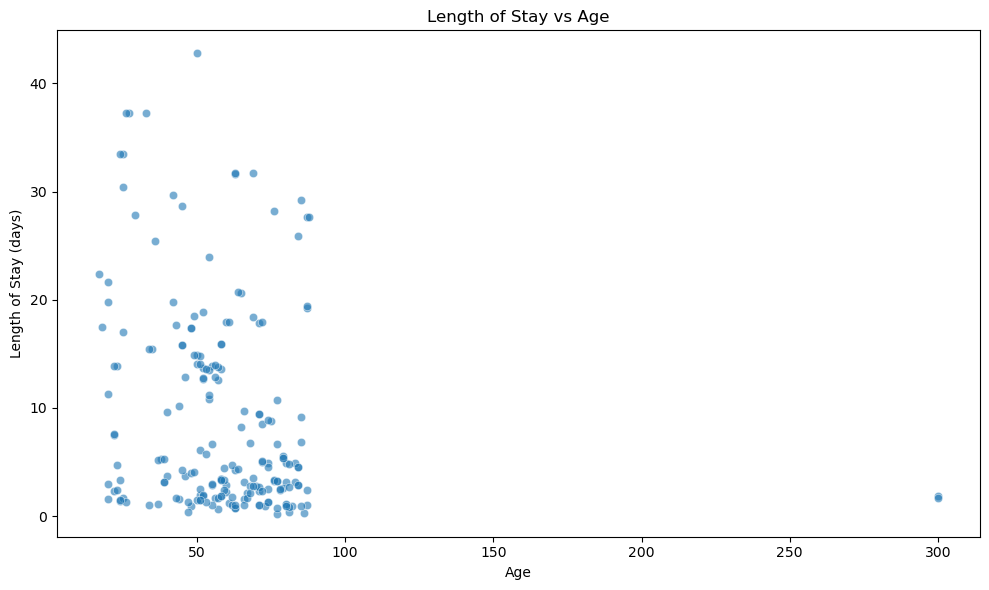

In [71]:
#Scatter plot of lenght of stay and age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='anchor_age', y='los', alpha=0.6)
plt.title('Length of Stay vs Age')
plt.xlabel('Age')
plt.ylabel('Length of Stay (days)')
plt.tight_layout()
# Show the plot
plt.show()


In [72]:
df = df[df['anchor_age'] <= 100]

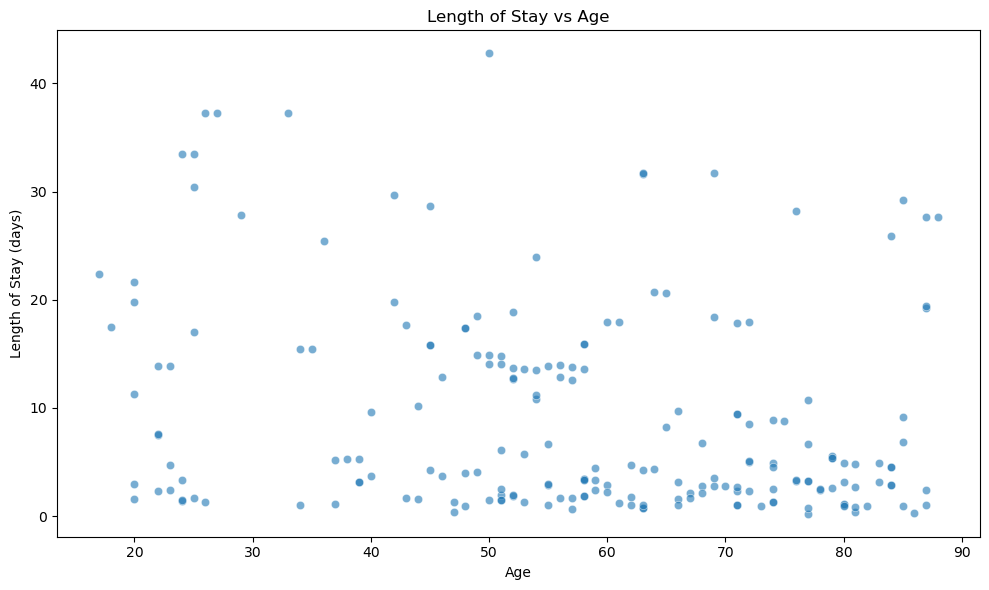

In [73]:
#Scatter plot of lenght of stay and age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='anchor_age', y='los', alpha=0.6)
plt.title('Length of Stay vs Age')
plt.xlabel('Age')
plt.ylabel('Length of Stay (days)')
plt.tight_layout()
# Show the plot
plt.show()

/var/folders/yg/f1g020cd6zl_n34fsq8_h_2r0000gn/T/ipykernel_91094/2567625056.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='drg_severity', y='los', ci=None)


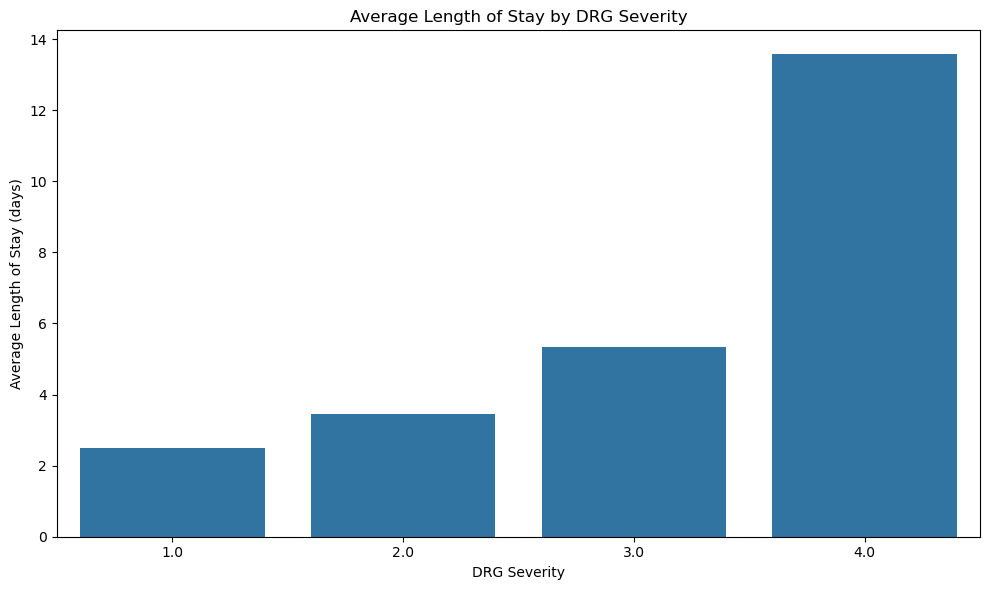

/var/folders/yg/f1g020cd6zl_n34fsq8_h_2r0000gn/T/ipykernel_91094/2567625056.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='drg_mortality', y='los', ci=None)


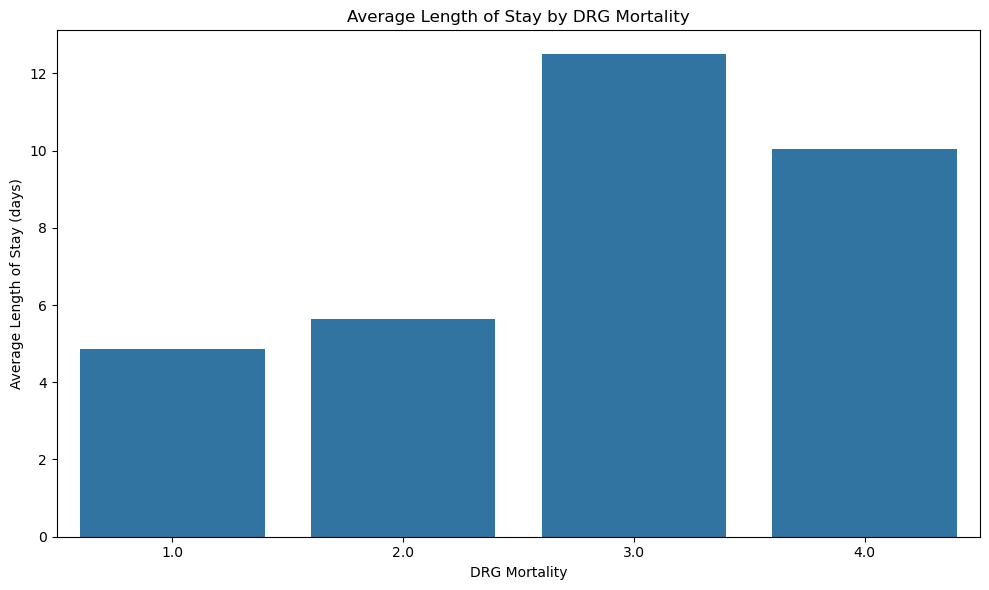

/var/folders/yg/f1g020cd6zl_n34fsq8_h_2r0000gn/T/ipykernel_91094/2567625056.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='drg_code', y='los', ci=None)


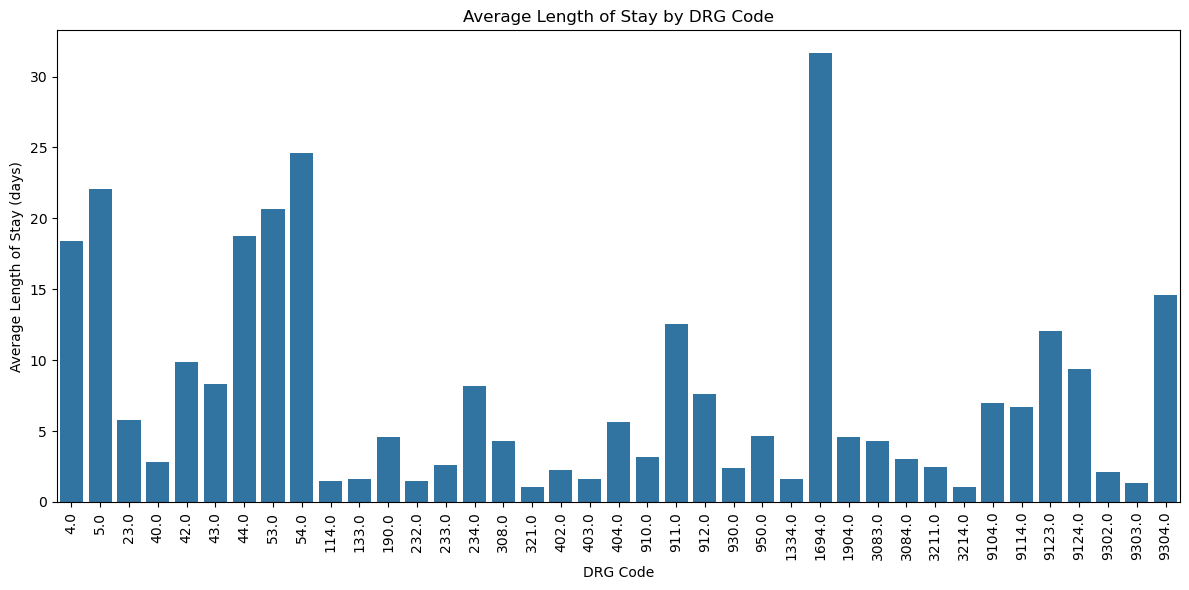

In [74]:
#Plot average los by drg_severity
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='drg_severity', y='los', ci=None)
plt.title('Average Length of Stay by DRG Severity')
plt.xlabel('DRG Severity')
plt.ylabel('Average Length of Stay (days)')
plt.tight_layout()
# Show the plot
plt.show()
#Plot average los by drg_mortality
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='drg_mortality', y='los', ci=None)
plt.title('Average Length of Stay by DRG Mortality')
plt.xlabel('DRG Mortality')
plt.ylabel('Average Length of Stay (days)')
plt.tight_layout()
# Show the plot
plt.show()
#Plot average los by drg_code
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='drg_code', y='los', ci=None)
plt.title('Average Length of Stay by DRG Code')
plt.xticks(rotation=90)
plt.xlabel('DRG Code')
plt.ylabel('Average Length of Stay (days)')
plt.tight_layout()
# Show the plot
plt.show()



In [75]:
df.columns

Index(['subject_id', 'hadm_id', 'seq_num', 'icd_code', 'admission_type',
       'admission_location', 'insurance', 'language', 'marital_status', 'race',
       'gender', 'anchor_age', 'first_careunit', 'last_careunit', 'los',
       'drg_code', 'description', 'drg_severity', 'drg_mortality', 'ed_los',
       'in_month', 'in_day', 'in_hour', 'is_weekend'],
      dtype='object')

In [76]:
df['admission_type'].value_counts()

admission_type
EMERGENCY    111
EW EMER.      84
URGENT         6
ELECTIVE       1
Name: count, dtype: int64

In [77]:
df.shape

(202, 24)

In [78]:
df['admission_location'].value_counts()

admission_location
EMERGENCY ROOM                            84
EMERGENCY ROOM ADMIT                      78
CLINIC REFERRAL/PREMATURE                 31
TRANSFER FROM HOSPITAL                     5
TRANSFER FROM SKILLED NURSING FACILITY     1
TRANSFER FROM SKILLED NUR                  1
PHYS REFERRAL/NORMAL DELI                  1
TRANSFER FROM HOSP/EXTRAM                  1
Name: count, dtype: int64

In [79]:
df['seq_num'].value_counts()

seq_num
1.0    152
2.0     23
3.0     15
4.0      5
6.0      4
7.0      2
9.0      1
Name: count, dtype: int64

In [80]:
df.drop(columns=['subject_id', 'hadm_id'], inplace=True)

In [81]:
df.columns

Index(['seq_num', 'icd_code', 'admission_type', 'admission_location',
       'insurance', 'language', 'marital_status', 'race', 'gender',
       'anchor_age', 'first_careunit', 'last_careunit', 'los', 'drg_code',
       'description', 'drg_severity', 'drg_mortality', 'ed_los', 'in_month',
       'in_day', 'in_hour', 'is_weekend'],
      dtype='object')

In [82]:
#Check data types of columns
df.dtypes

seq_num               float64
icd_code                int64
admission_type         object
admission_location     object
insurance              object
language               object
marital_status         object
race                   object
gender                 object
anchor_age              int64
first_careunit         object
last_careunit          object
los                   float64
drg_code              float64
description            object
drg_severity          float64
drg_mortality         float64
ed_los                float64
in_month               object
in_day                 object
in_hour                 int32
is_weekend               bool
dtype: object

In [83]:
df['drg_severity'] = df['drg_severity'].astype('category')
df['drg_mortality'] = df['drg_mortality'].astype('category')
df['is_weekend'] = df['is_weekend'].astype(int)
df.drop(columns=['description', 'in_hour'], inplace=True)

In [84]:
categorical_cols = ['seq_num', 'icd_code', 'admission_type','admission_location','insurance','language','marital_status','race','gender','first_careunit','last_careunit','drg_code','in_month','in_day']
df[categorical_cols] = df[categorical_cols].astype('category')

In [85]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [86]:
df_encoded.shape

(202, 135)

In [87]:
df_encoded.head()

,anchor_age,los,drg_severity,drg_mortality,ed_los,is_weekend,seq_num_2.0,seq_num_3.0,seq_num_4.0,seq_num_6.0,...,in_month_May,in_month_November,in_month_October,in_month_September,in_day_Monday,in_day_Saturday,in_day_Sunday,in_day_Thursday,in_day_Tuesday,in_day_Wednesday
0,71,2.301308,2.0,2.0,658.0,0,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
1,58,1.893750,2.0,1.0,372.0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,48,17.376539,4.0,3.0,384.0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,55,13.884815,4.0,3.0,183.0,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,85,29.218449,3.0,3.0,212.0,1,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [88]:
df['icd_code'].value_counts()

icd_code
80600    56
80605    34
80609    28
80604    21
80608    17
80601    15
80606    13
80603     8
80607     7
80602     3
Name: count, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target variable
X = df_encoded.drop(columns=['los'])  # Features
y = df_encoded['los']                   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error (MAE): 9.127398922286412
Mean Squared Error (MSE): 170.09517851939336
R-squared: -0.9380581139096391


In [91]:
df_encoded.to_csv("../data/processed_data.csv", index=False)

In [92]:
df.dtypes

seq_num               category
icd_code              category
admission_type        category
admission_location    category
insurance             category
language              category
marital_status        category
race                  category
gender                category
anchor_age               int64
first_careunit        category
last_careunit         category
los                    float64
drg_code              category
drg_severity          category
drg_mortality         category
ed_los                 float64
in_month              category
in_day                category
is_weekend               int64
dtype: object

In [93]:
df.to_csv("../data/notdummies_data.csv", index=False)